In [1]:
import pandas as pd
from preprocessing import get_models_and_soups_df
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
plt.style.use("style.mplstyle")

In [2]:
soups, models = get_models_and_soups_df()

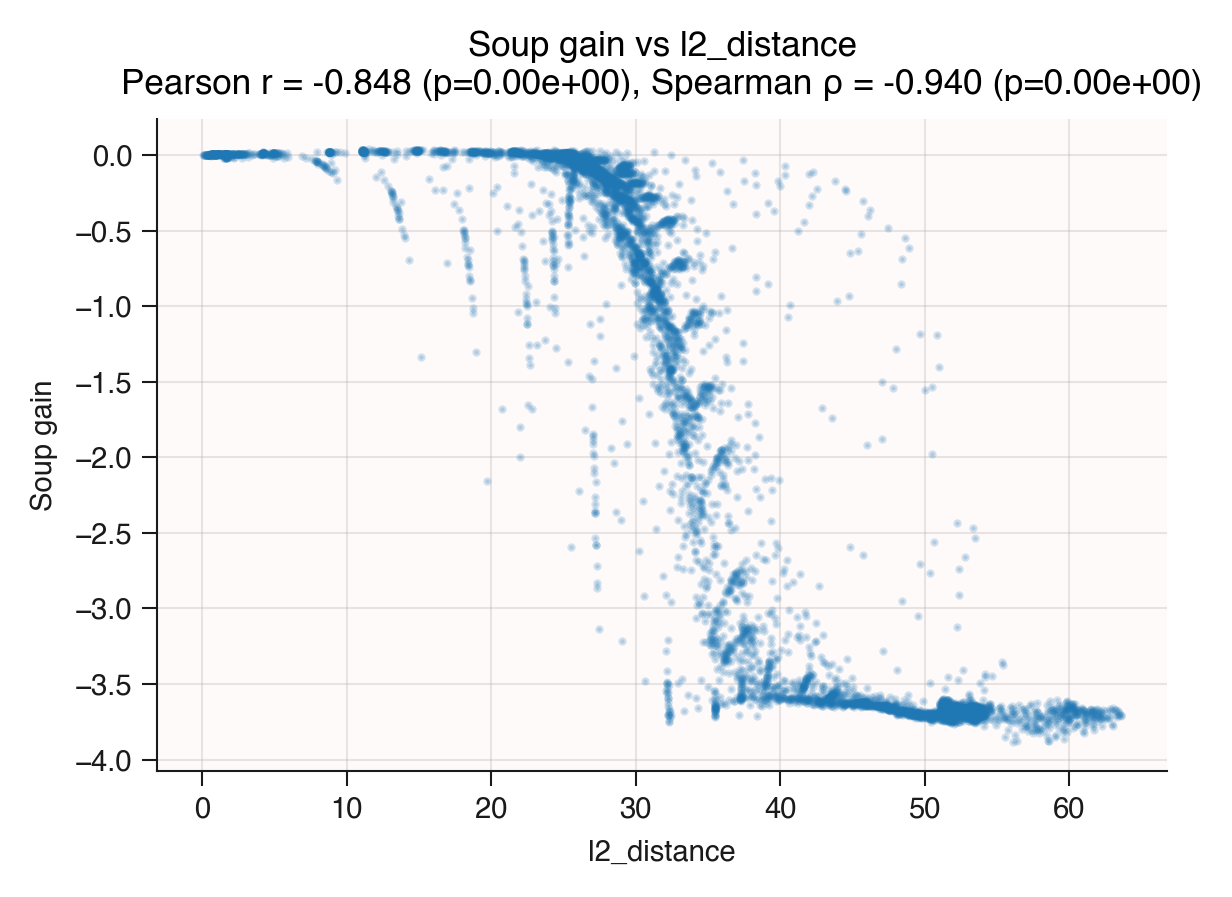

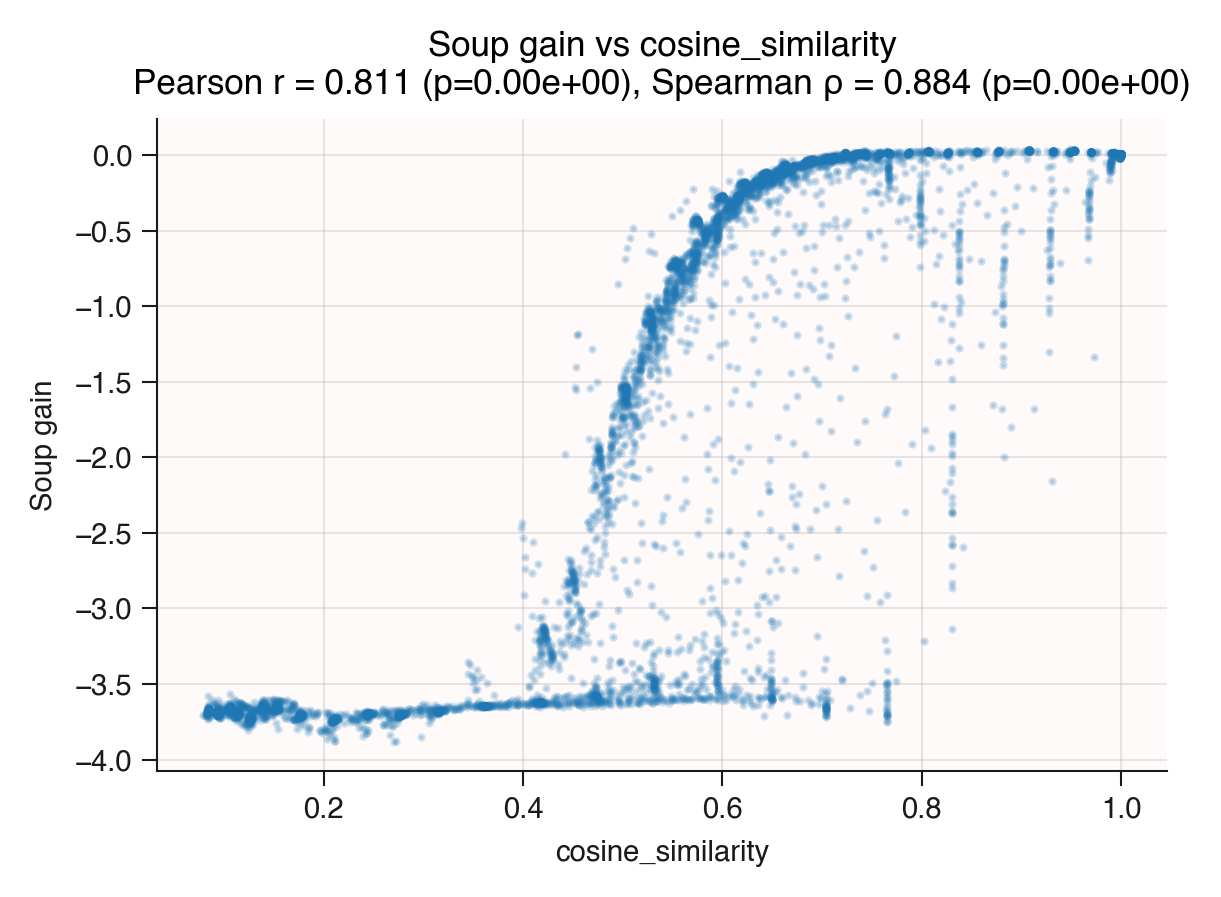

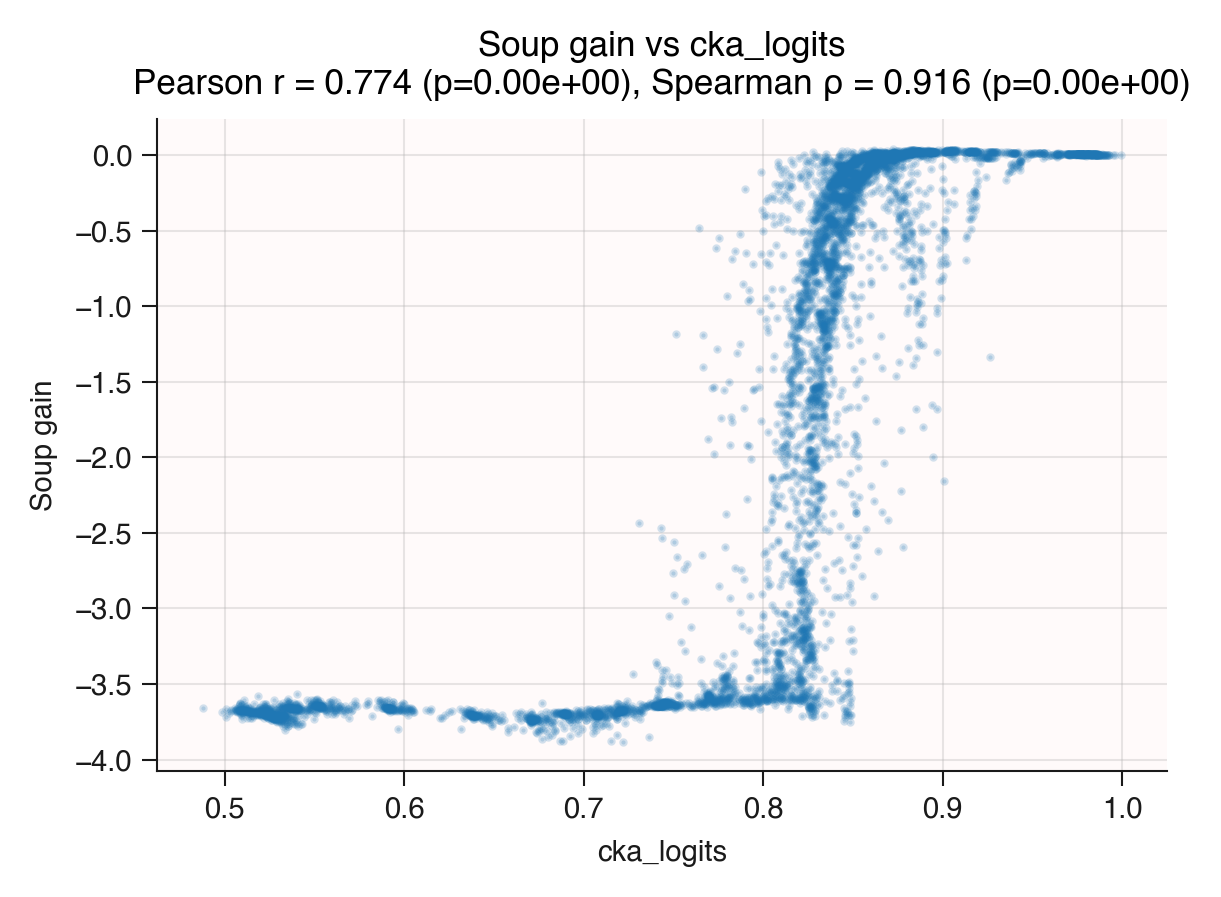

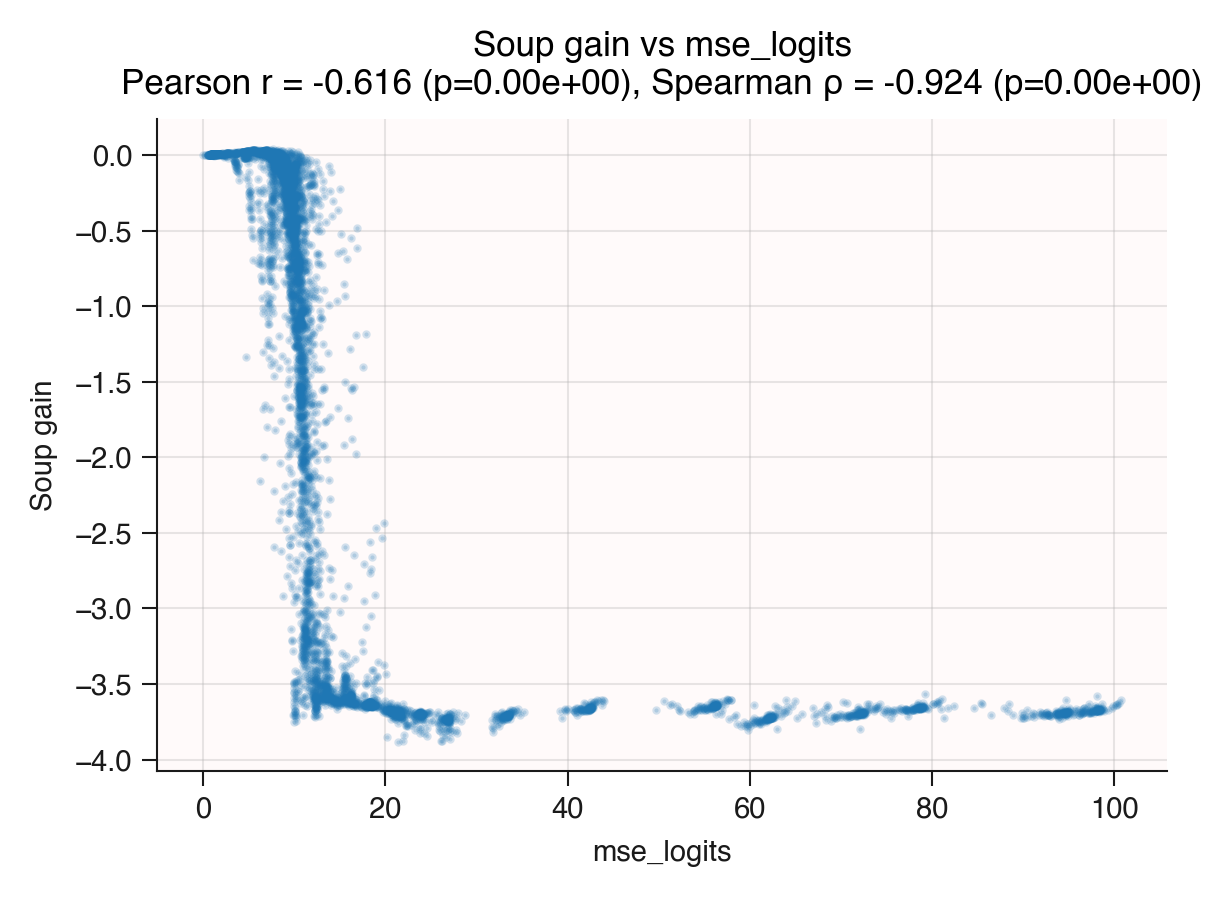

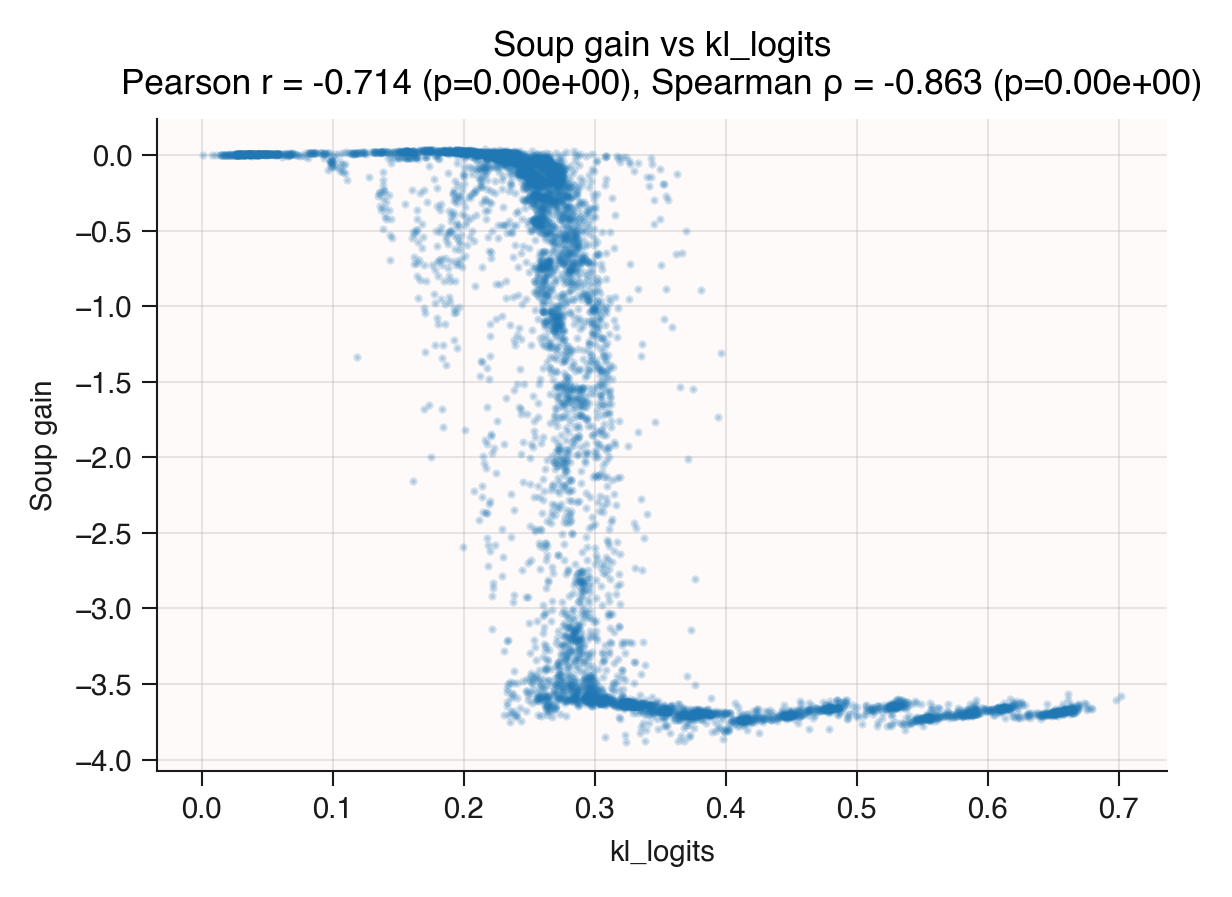

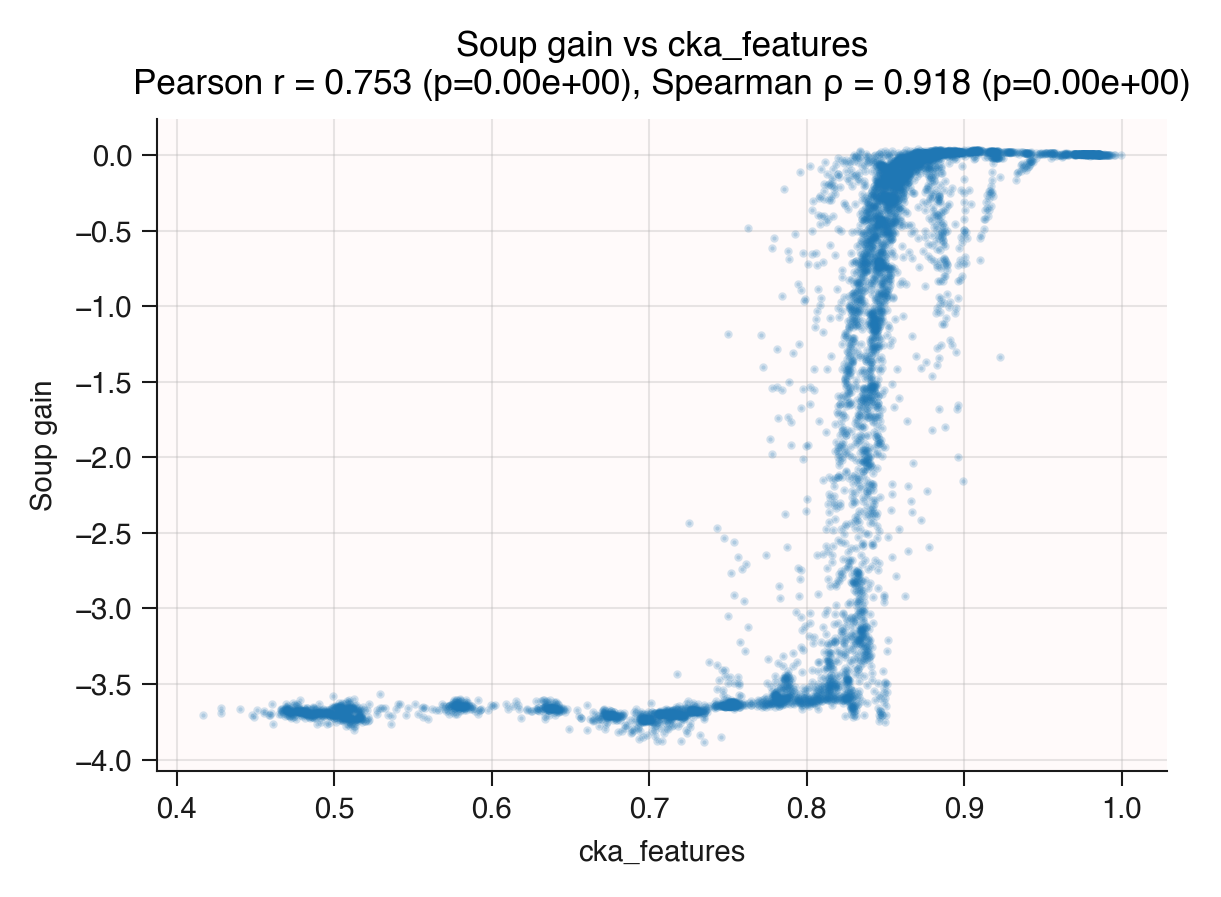

In [3]:
similarity_metrics = [
    'l2_distance',
    'cosine_similarity',
    'cka_logits',
    'mse_logits',
    'kl_logits',
    'cka_features'
]

for metric in similarity_metrics:
    # Select and drop NaNs
    df = soups[[metric, 'soup_gain']].dropna()
    x = df[metric].to_numpy()
    y = df['soup_gain'].to_numpy()

    # Correlations
    pearson_r, pearson_p = pearsonr(x, y)
    spearman_r, spearman_p = spearmanr(x, y)

    # Plot
    fig, ax = plt.subplots()

    ax.scatter(x, y, alpha=0.2, s=1)

    ax.set_xlabel(metric)
    ax.set_ylabel('Soup gain')
    ax.set_title(
        f'Soup gain vs {metric}\n'
        f'Pearson r = {pearson_r:.3f} (p={pearson_p:.2e}), '
        f'Spearman ρ = {spearman_r:.3f} (p={spearman_p:.2e})'
    )

    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

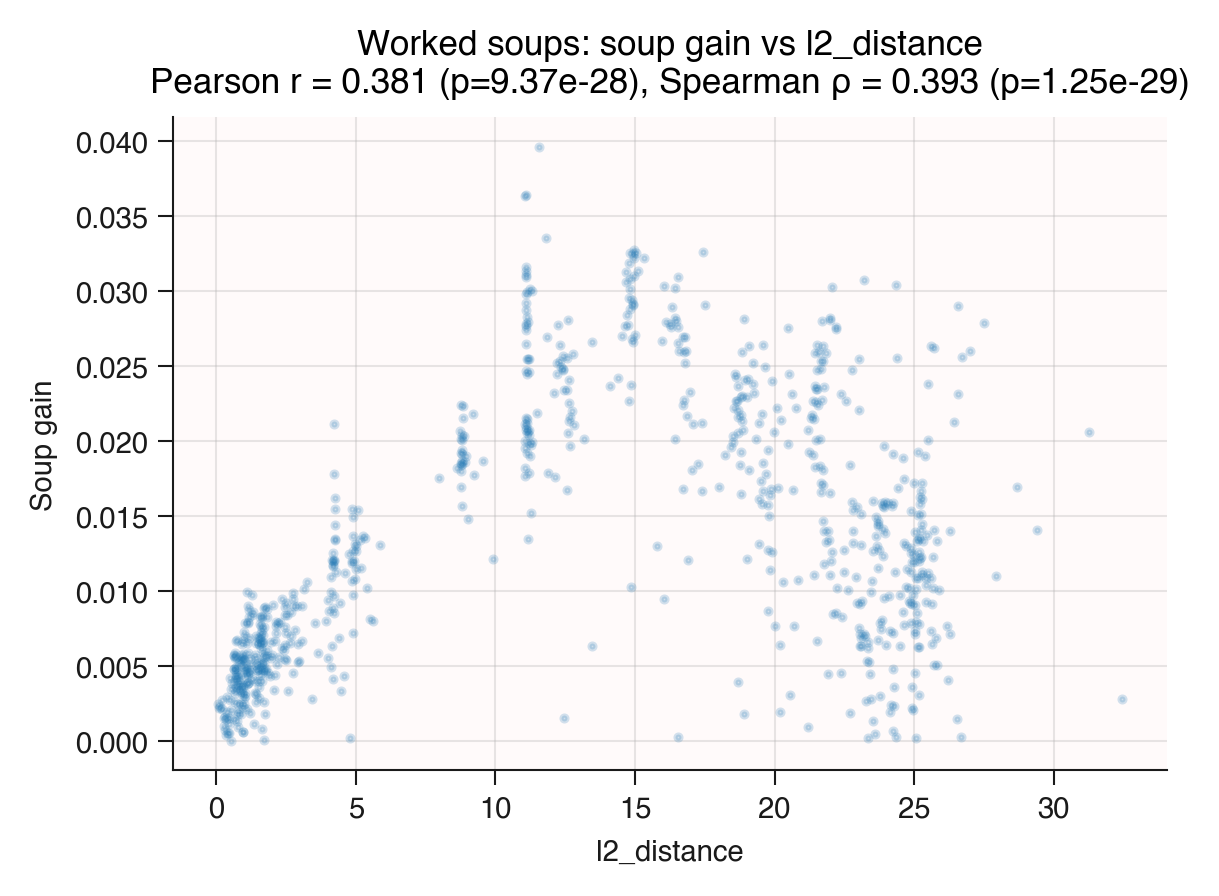

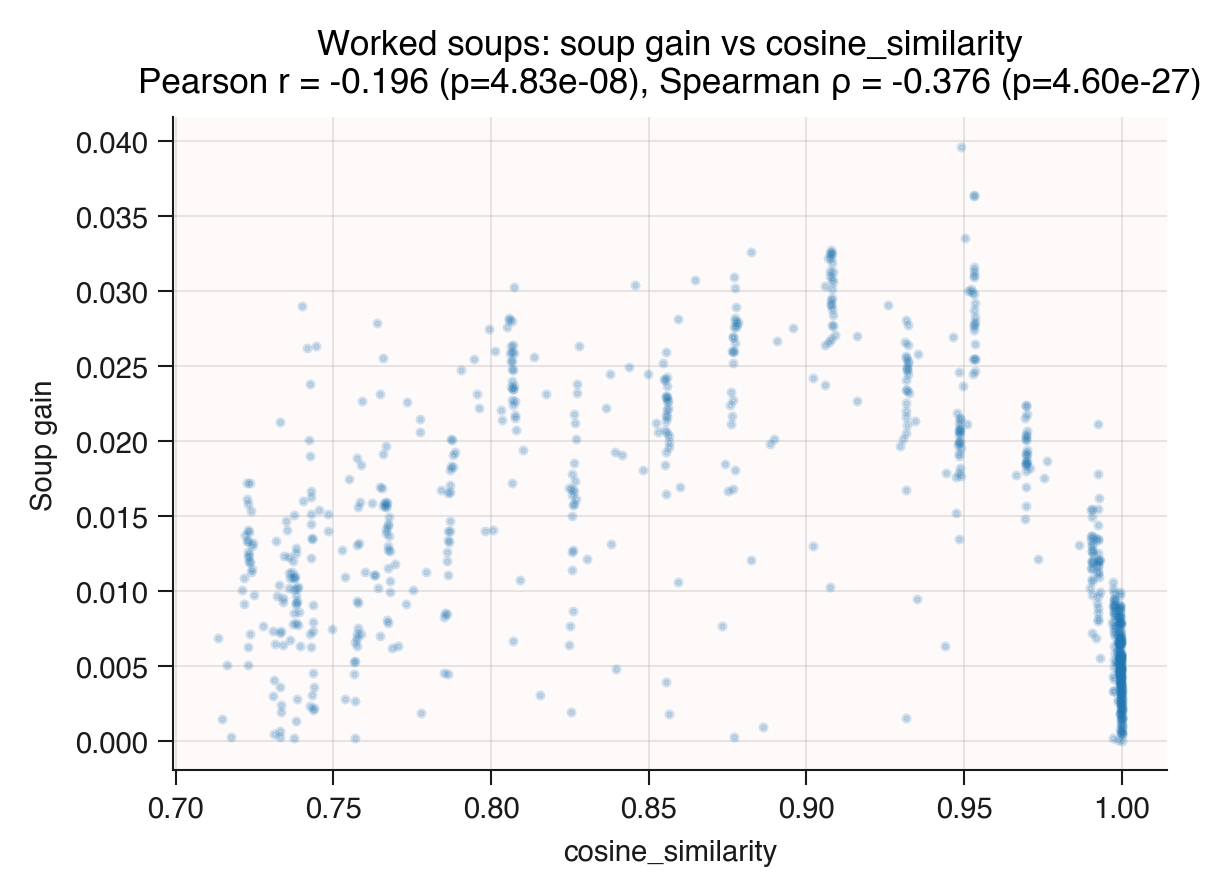

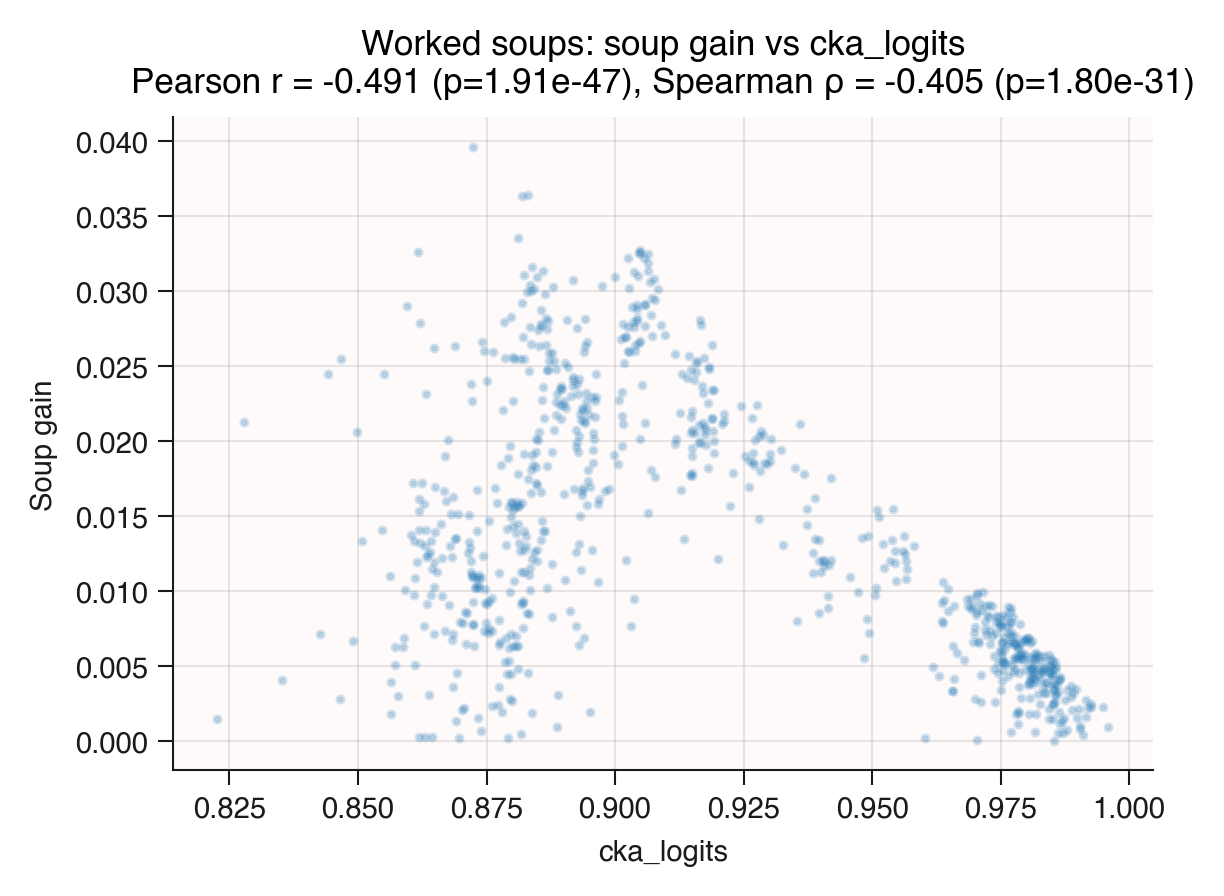

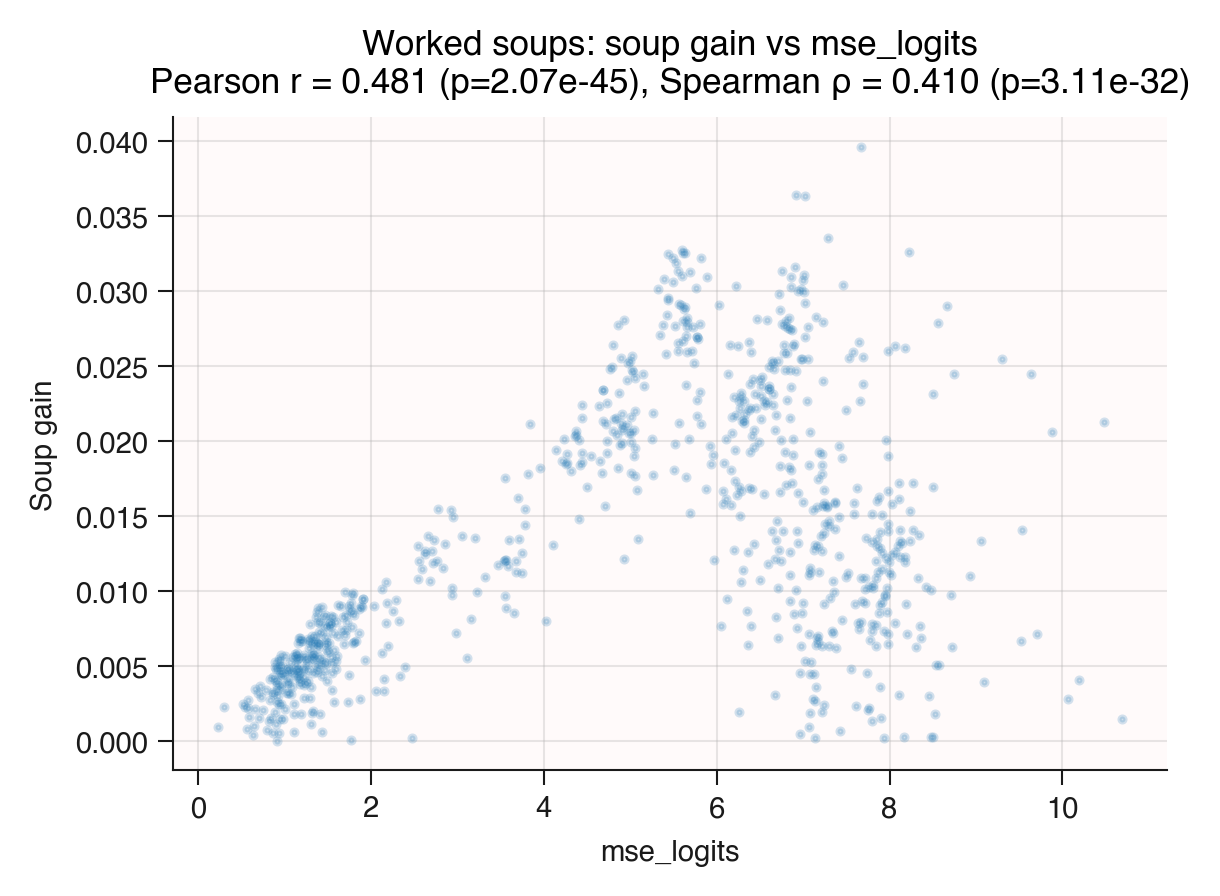

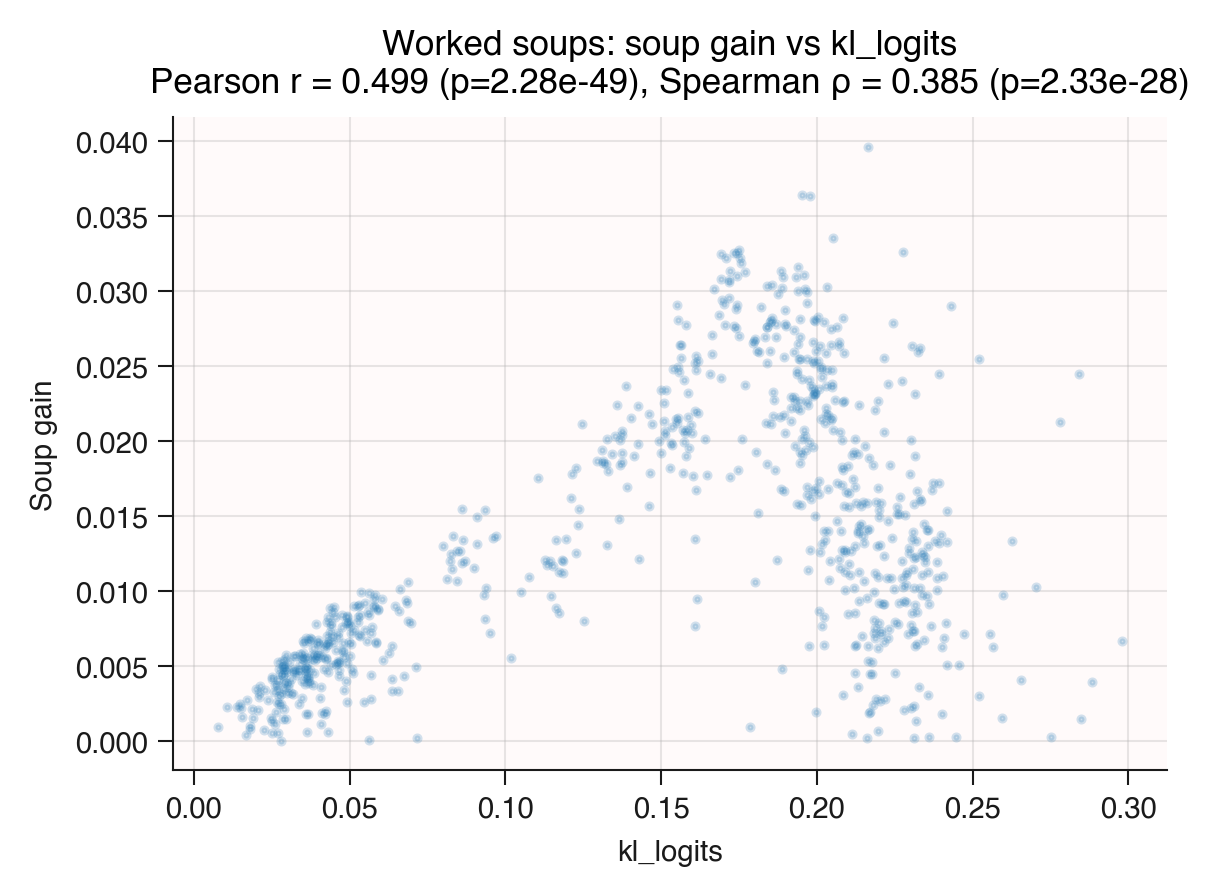

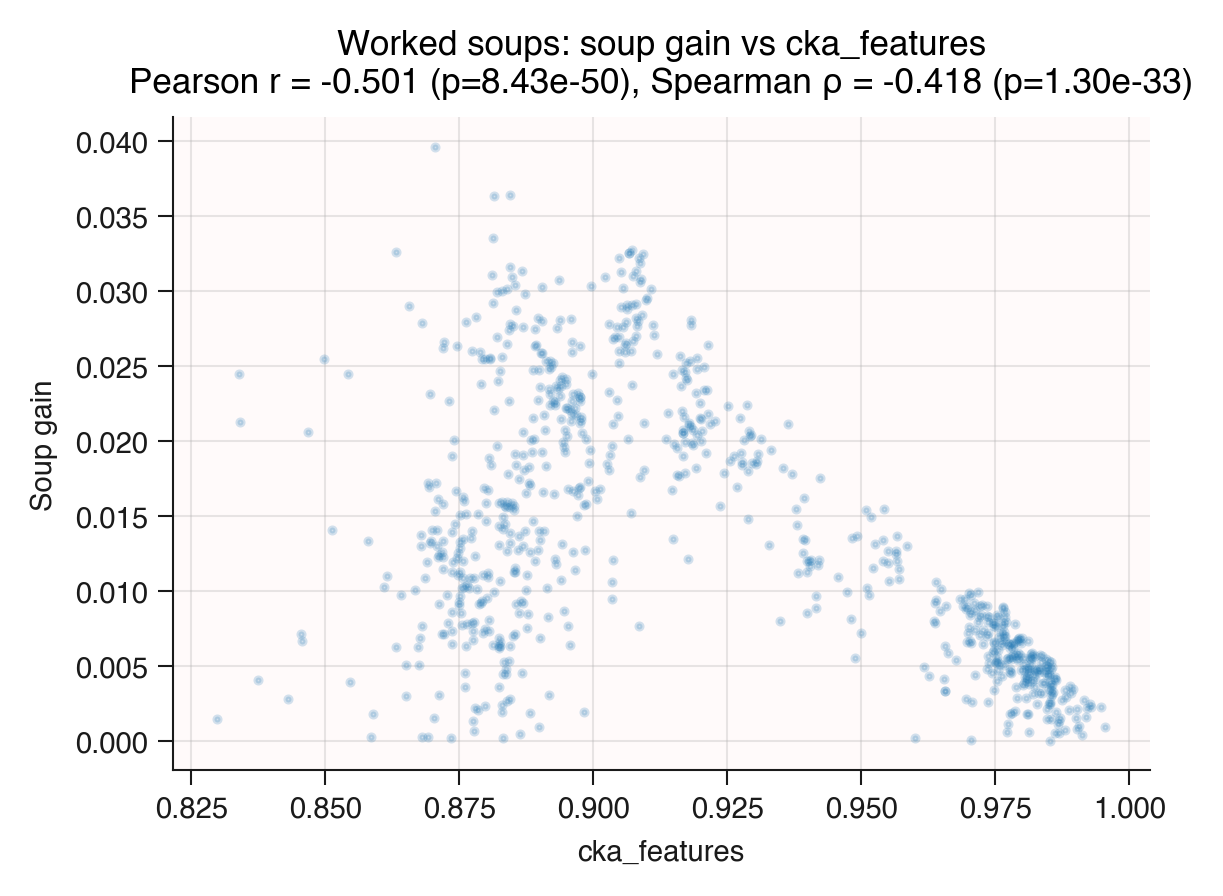

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

similarity_metrics = [
    'l2_distance',
    'cosine_similarity',
    'cka_logits',
    'mse_logits',
    'kl_logits',
    'cka_features'
]

# Keep only soups that worked
soups_pos = soups[soups['soup_gain'] > 0]

for metric in similarity_metrics:
    # Select and drop NaNs
    df = soups_pos[[metric, 'soup_gain']].dropna()
    x = df[metric].to_numpy()
    y = df['soup_gain'].to_numpy()

    if len(x) < 2:
        print(f'Skipping {metric}: not enough data')
        continue

    # Correlations
    pearson_r, pearson_p = pearsonr(x, y)
    spearman_r, spearman_p = spearmanr(x, y)

    # Plot
    fig, ax = plt.subplots()

    ax.scatter(x, y, alpha=0.2, s=2)

    ax.set_xlabel(metric)
    ax.set_ylabel('Soup gain')
    ax.set_title(
        f'Worked soups: soup gain vs {metric}\n'
        f'Pearson r = {pearson_r:.3f} (p={pearson_p:.2e}), '
        f'Spearman ρ = {spearman_r:.3f} (p={spearman_p:.2e})'
    )

    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
